In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-dropout-and-academic-success/Predict Students Dropout and Academic Success.csv


In [2]:
# Load the dataset
file_path = "/kaggle/input/students-dropout-and-academic-success/Predict Students Dropout and Academic Success.csv"
df = pd.read_csv(file_path)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

Dataset Shape: (4424, 37)
Columns: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (appro

In [4]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# EDA

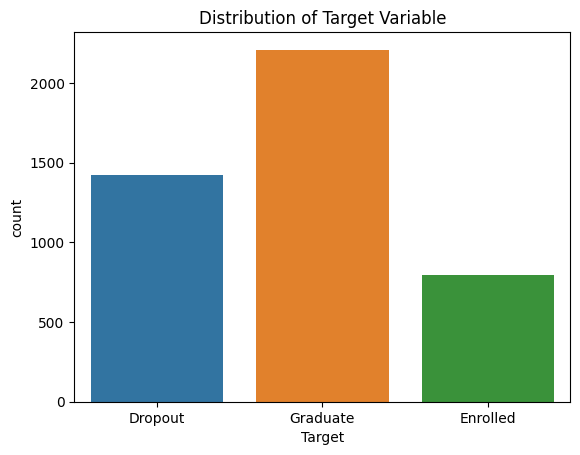

Target Distribution (%):
 Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of the target variable
sns.countplot(x="Target", data=df)
plt.title("Distribution of Target Variable")
plt.show()

# Percentage distribution
target_distribution = df["Target"].value_counts(normalize=True) * 100
print("Target Distribution (%):\n", target_distribution)

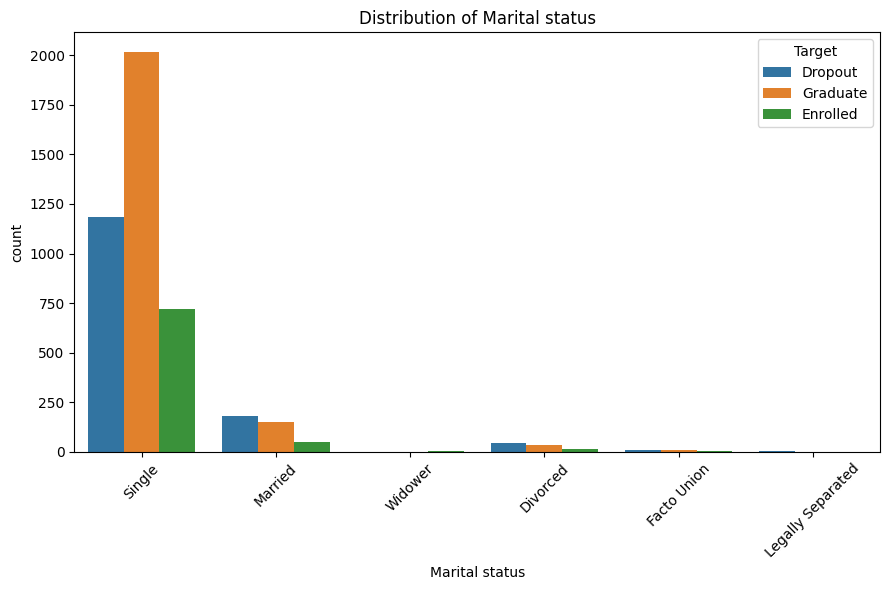

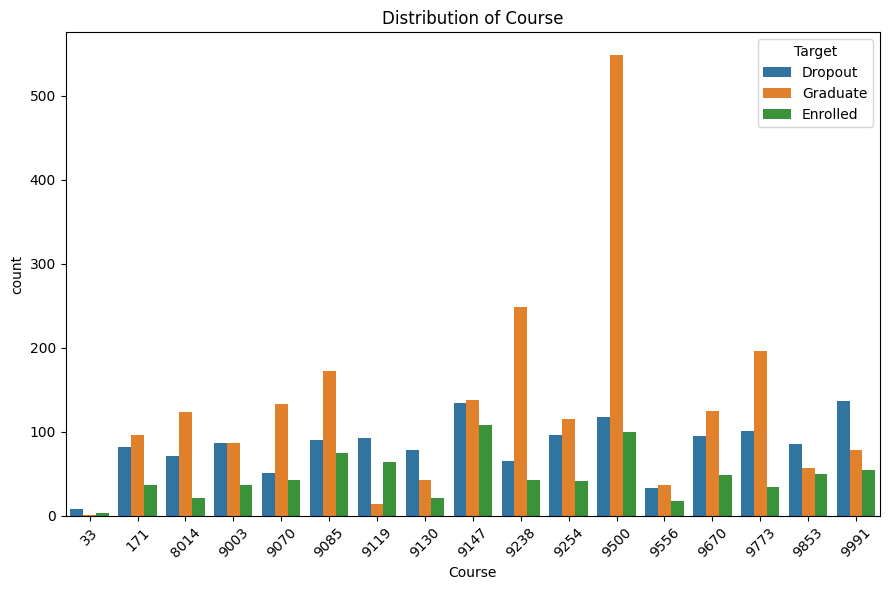

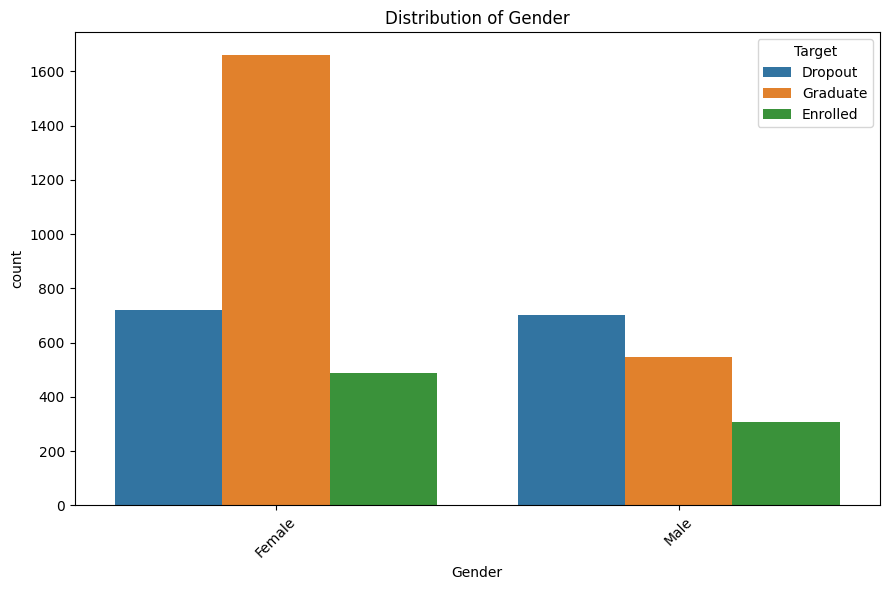

In [6]:
marital_status_labels = {
    1: "Single",
    2: "Married",
    3: "Widower",
    4: "Divorced",
    5: "Facto Union",
    6: "Legally Separated"
}

gender_labels = {
    1: "Male",
    0: "Female"
}

# List of categorical features
categorical_features = ["Marital status", "Course", "Gender"]

# Loop through each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(9, 6))  
    ax = sns.countplot(x=feature, data=df,hue='Target')
    if feature == "Marital status":
        ax.set_xticklabels([marital_status_labels[int(x.get_text())] for x in ax.get_xticklabels()])
    elif feature == "Gender":
        ax.set_xticklabels([gender_labels[int(x.get_text())] for x in ax.get_xticklabels()])
        
    plt.xticks(rotation=45)  # Adjust rotation angle as needed
    plt.title(f"Distribution of {feature}")
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

#### Let's create a new feature that captures the student's academic progression or lack thereof, to provide insight into the improvement or deterioration in performance, which could be a useful signal for predicting dropout.

In [7]:
df['Grade Disparity'] = df['Curricular units 2nd sem (grade)'] - df['Curricular units 1st sem (grade)']
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Grade Disparity
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0.000000
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,-0.333333
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0.000000
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,-1.028571
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0.666667


In [8]:
# Removing enrolled students to simplify the analysis
df = df[(df['Target'] == 'Graduate') | (df['Target'] == 'Dropout')]
df['Target'] = df['Target'].map({'Dropout': 1, 'Graduate': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance	                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                        

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Target"])  # Features (all columns except 'Target')
y = df["Target"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


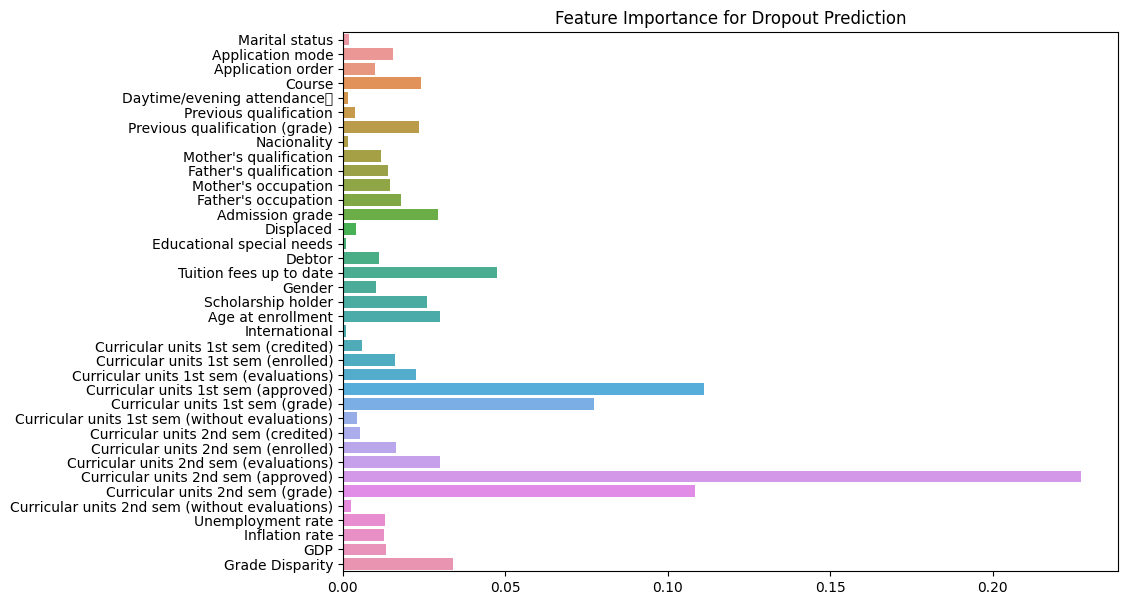

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 7))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance for Dropout Prediction")
plt.show()

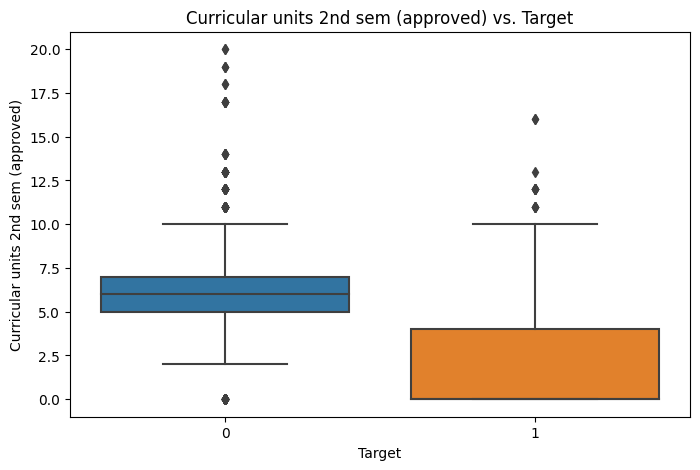

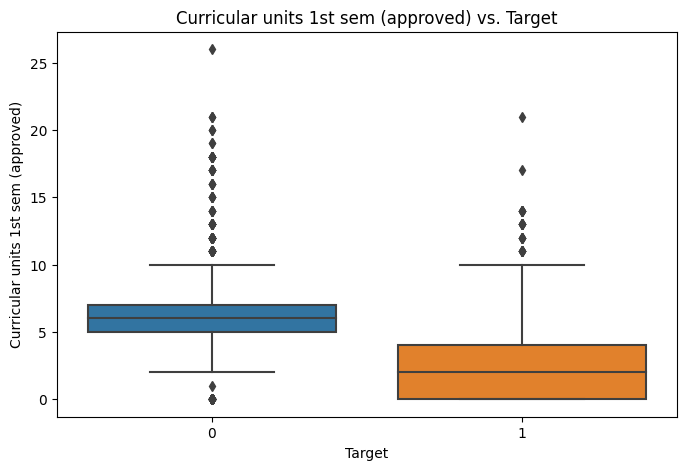

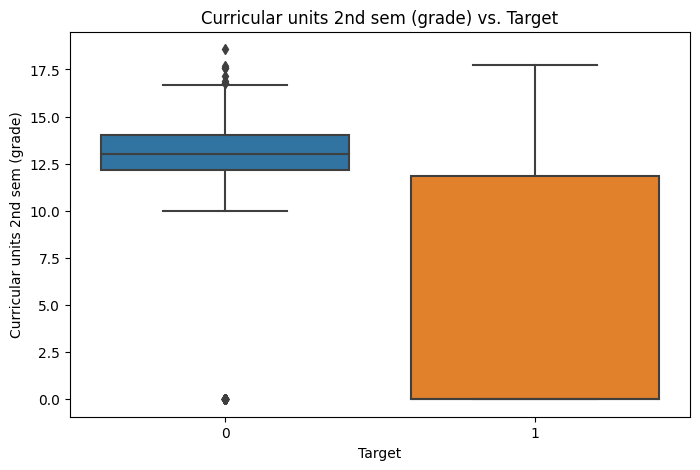

In [11]:
# Visualize the top 3 most important features
top_features = feature_names[importances.argsort()[-3:][::-1]]

for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Target", y=feature, data=df)
    plt.title(f"{feature} vs. Target")
    plt.show()

#### While these top features are strong predictors of dropout, they are most likely consequences of underlying issues rather than the root causes. The real question is: Why do some students get lower grades or struggle academically?

In [12]:
# Sort the feature names by importance
indices = np.argsort(importances)[::-1]

sorted_feature_names = feature_names[indices]
sorted_importances = importances[indices]

for name, importance in zip(sorted_feature_names, sorted_importances):
    print(f"{name}: {importance:.4f}")

Curricular units 2nd sem (approved): 0.2272
Curricular units 1st sem (approved): 0.1112
Curricular units 2nd sem (grade): 0.1084
Curricular units 1st sem (grade): 0.0774
Tuition fees up to date: 0.0476
Grade Disparity: 0.0339
Age at enrollment: 0.0300
Curricular units 2nd sem (evaluations): 0.0298
Admission grade: 0.0292
Scholarship holder: 0.0260
Course: 0.0241
Previous qualification (grade): 0.0235
Curricular units 1st sem (evaluations): 0.0226
Father's occupation: 0.0179
Curricular units 2nd sem (enrolled): 0.0165
Curricular units 1st sem (enrolled): 0.0159
Application mode: 0.0154
Mother's occupation: 0.0144
Father's qualification: 0.0140
GDP: 0.0133
Unemployment rate: 0.0129
Inflation rate: 0.0126
Mother's qualification: 0.0118
Debtor: 0.0112
Gender: 0.0102
Application order: 0.0100
Curricular units 1st sem (credited): 0.0058
Curricular units 2nd sem (credited): 0.0052
Curricular units 1st sem (without evaluations): 0.0043
Displaced: 0.0041
Previous qualification: 0.0037
Curricula

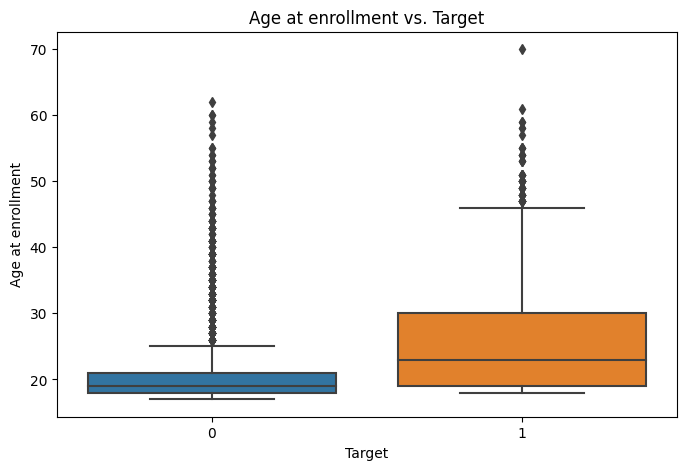

In [13]:
plt.figure(figsize=(8, 5))
feature = "Age at enrollment"
sns.boxplot(x="Target", y=feature, data=df)
plt.title(f"{feature} vs. Target")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


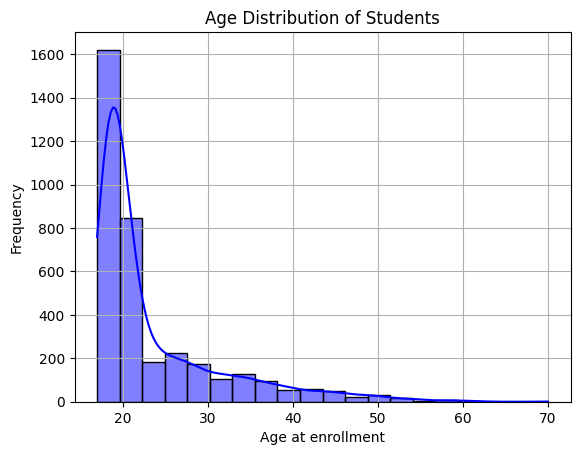

In [14]:
sns.histplot(X['Age at enrollment'], bins=20, kde=True, color='blue')
plt.xlabel('Age at enrollment')
plt.ylabel('Frequency')
plt.title('Age Distribution of Students')
plt.grid(True)

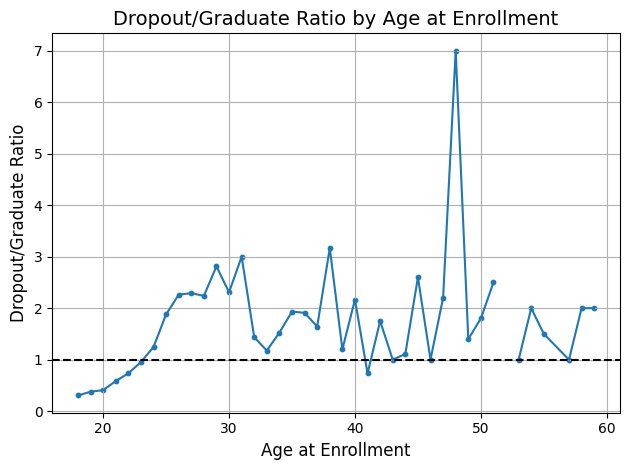

In [15]:
a = (df[df['Target'] == 1].groupby('Age at enrollment').count()['Target'])
b = (df[df['Target'] == 0].groupby('Age at enrollment').count()['Target'])
dropout_rate = a/b

# Plot the dropout/graduation ratio
plt.plot(dropout_rate, color='tab:blue')
plt.scatter(dropout_rate.index, dropout_rate, color='tab:blue', s=10)
plt.axhline(y=1, linestyle='--', color='black')
plt.grid(True)

plt.title('Dropout/Graduate Ratio by Age at Enrollment', fontsize=14)
plt.xlabel('Age at Enrollment', fontsize=12)
plt.ylabel('Dropout/Graduate Ratio', fontsize=12)
plt.tight_layout()

#### Most students who enroll at 24 or older dropout! Students who are older may have more life responsibilities (e.g., family, work), which could make it harder for them to focus on their studies. They may struggle with time management or feel the pressure of balancing academics with other aspects of life. 

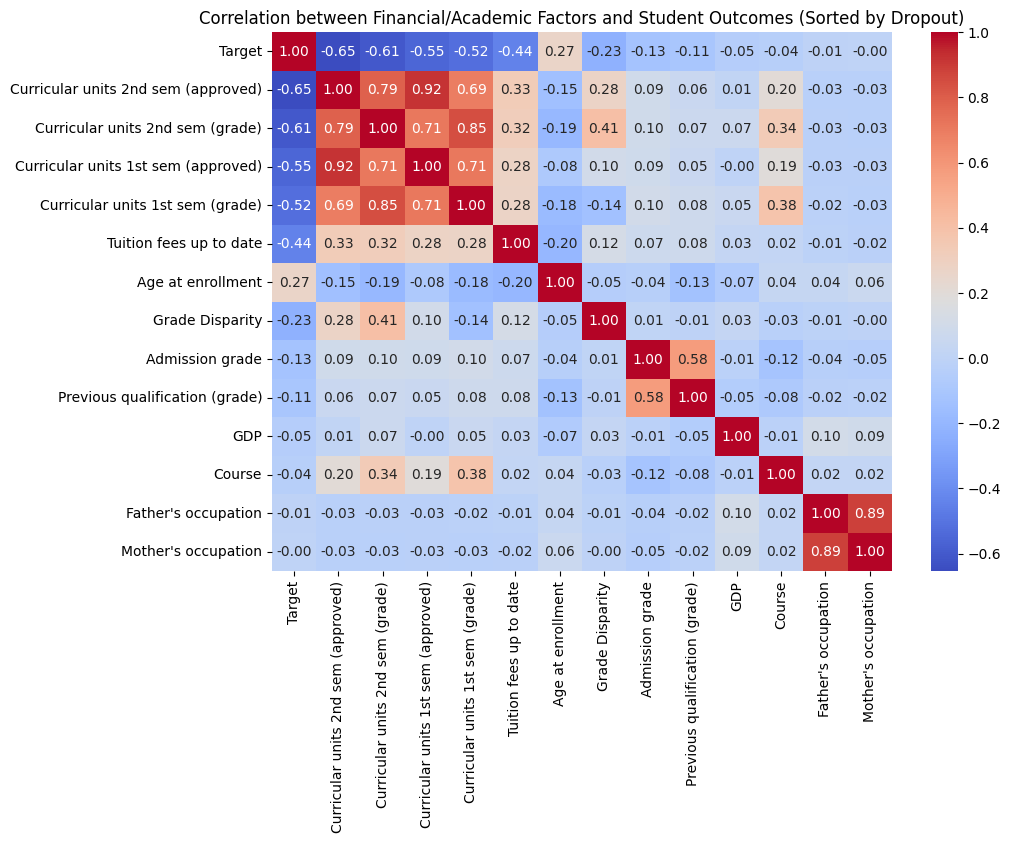

In [16]:
# Select relevant features
features = [
    'Tuition fees up to date', 'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 
    'Curricular units 2nd sem (approved)', 'Grade Disparity', 
    "Father's occupation", "Mother's occupation", 'Course', 'GDP',
    'Admission grade', 'Previous qualification (grade)', 'Age at enrollment',
    'Target'
]

# Compute correlation matrix
corr_matrix = df[features].corr()

# Sort by the correlation with 'Dropout'
corr_with_dropout = corr_matrix['Target'].abs().sort_values(ascending=False)
sorted_features = corr_with_dropout.index
sorted_corr_matrix = corr_matrix.loc[sorted_features, sorted_features]

plt.figure(figsize=(10, 7))
sns.heatmap(sorted_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Financial/Academic Factors and Student Outcomes (Sorted by Dropout)")
plt.show()

#### Since the correlation between financial issues and dropout (-0.43) is stronger in magnitude than the correlation between financial issues and grades (0.28 - 0.33). This suggests that students facing financial hardship often leave due to direct financial pressures rather than academic struggles alone. 

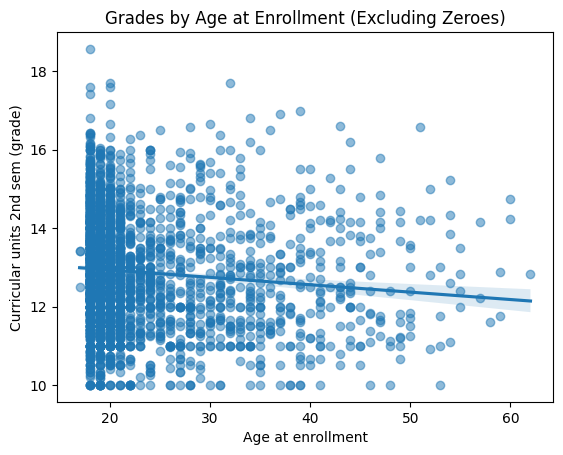

In [17]:
# Filter out rows where 'Curricular units 2nd sem (grade)' is zero
filtered_data = X[X['Curricular units 2nd sem (grade)'] != 0]

sns.regplot(
    x=filtered_data['Age at enrollment'], 
    y=filtered_data['Curricular units 2nd sem (grade)'], 
    scatter_kws={'alpha': 0.5}
)
plt.xlabel('Age at enrollment')
plt.ylabel('Curricular units 2nd sem (grade)')
plt.title('Grades by Age at Enrollment (Excluding Zeroes)')
plt.show()

#### While there is a slight decrease in grades with age, the difference is small, and external factors (e.g., financial constraints, job commitments) likely play a significant role in dropouts. 

# Let's build a model to predict dropout.

In [18]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Target',axis=1)
y = df['Target']
y

0       1
1       0
2       1
3       0
4       0
       ..
4419    0
4420    1
4421    1
4422    0
4423    0
Name: Target, Length: 3630, dtype: int64

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance	                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                        

#### Scaling the data and splitting into train and test sets

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 1) Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest model
model = RandomForestClassifier(class_weight='balanced')

# Train the model and make predictions on the test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       449
           1       0.92      0.81      0.86       277

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Define the parameter grid for tuning
param_dist = {
    'n_estimators': [500, 1000, 2000],  
    'max_depth': [10, 20, None],  
    'min_samples_split': [3, 5, 7],  
    'min_samples_leaf': [1, 2]  
}

# Initialize RandomizedSearchCV with recall as the scoring metric
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 3}),  # Include class_weight here
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,  
    scoring='recall',  
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best model with the optimal parameters
best_model = random_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Use the best model to make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


Best Parameters: {'n_estimators': 2000, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 10}
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       449
           1       0.86      0.85      0.86       277

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



#### 2) XGBoost

In [23]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [20, None],  # Instead of None, a defined range
    'gamma': [0.1, 0.2, 0.3],
    'scale_pos_weight': [1, 1.5]
}

grid_search = GridSearchCV(
    xgb.XGBClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',  # Keep recall as the scoring metric
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

# Get the predicted probabilities
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]  # Probability of dropout class

# Set a moderate custom threshold (e.g., 0.5)
threshold = 0.5
y_pred_custom = (y_pred_proba >= threshold).astype(int)

# Predicting for the training set
y_train_pred = best_xgb.predict(X_train)

# Print the classification reports
print("Training classification report:")
print(classification_report(y_train, y_train_pred))

print("Best Parameters:", grid_search.best_params_)
print("Test classification report (with adjusted threshold):")
print(classification_report(y_test, y_pred_custom))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Training classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1760
           1       1.00      1.00      1.00      1144

    accuracy                           1.00      2904
   macro avg       1.00      1.00      1.00      2904
weighted avg       1.00      1.00      1.00      2904

Best Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200, 'scale_pos_weight': 1}
Test classification report (with adjusted threshold):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       449
           1       0.90      0.83      0.86       277

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



#### Similar performance to RandomForest, let's try

#### 3) Deep Learning

In [24]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

# Initialize the neural network
model = Sequential()

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  # binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Pass class weights to the fit methodv
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test), verbose=0, class_weight=class_weights)

y_pred_dl = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
print(classification_report(y_test, y_pred_dl))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       449
           1       0.92      0.81      0.86       277

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



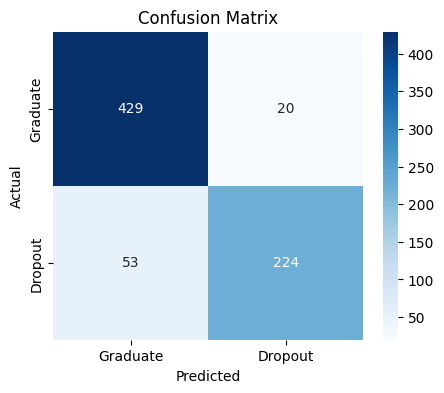

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_dl)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### - The **87% recall** ensures that most at-risk students are flagged for intervention.
#### - The **85% precision** reduces unnecessary interventions, optimizing resource allocation.
#### **Future improvements** could focus on exploring additional features or model architectures to enhance predictive power.

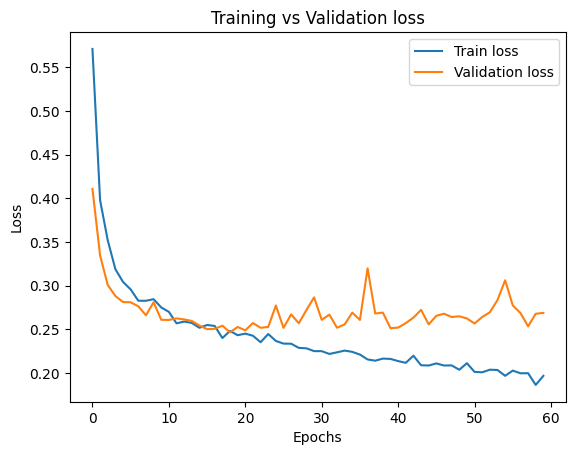

In [27]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation loss')
plt.show()

### Implementing SHAP (SHapley Additive Explanations) to analyze which features contribute the most

PermutationExplainer explainer: 727it [00:55, 11.68it/s]
Glyph 9 (	) missing from current font.
Glyph 9 (	) missing from current font.


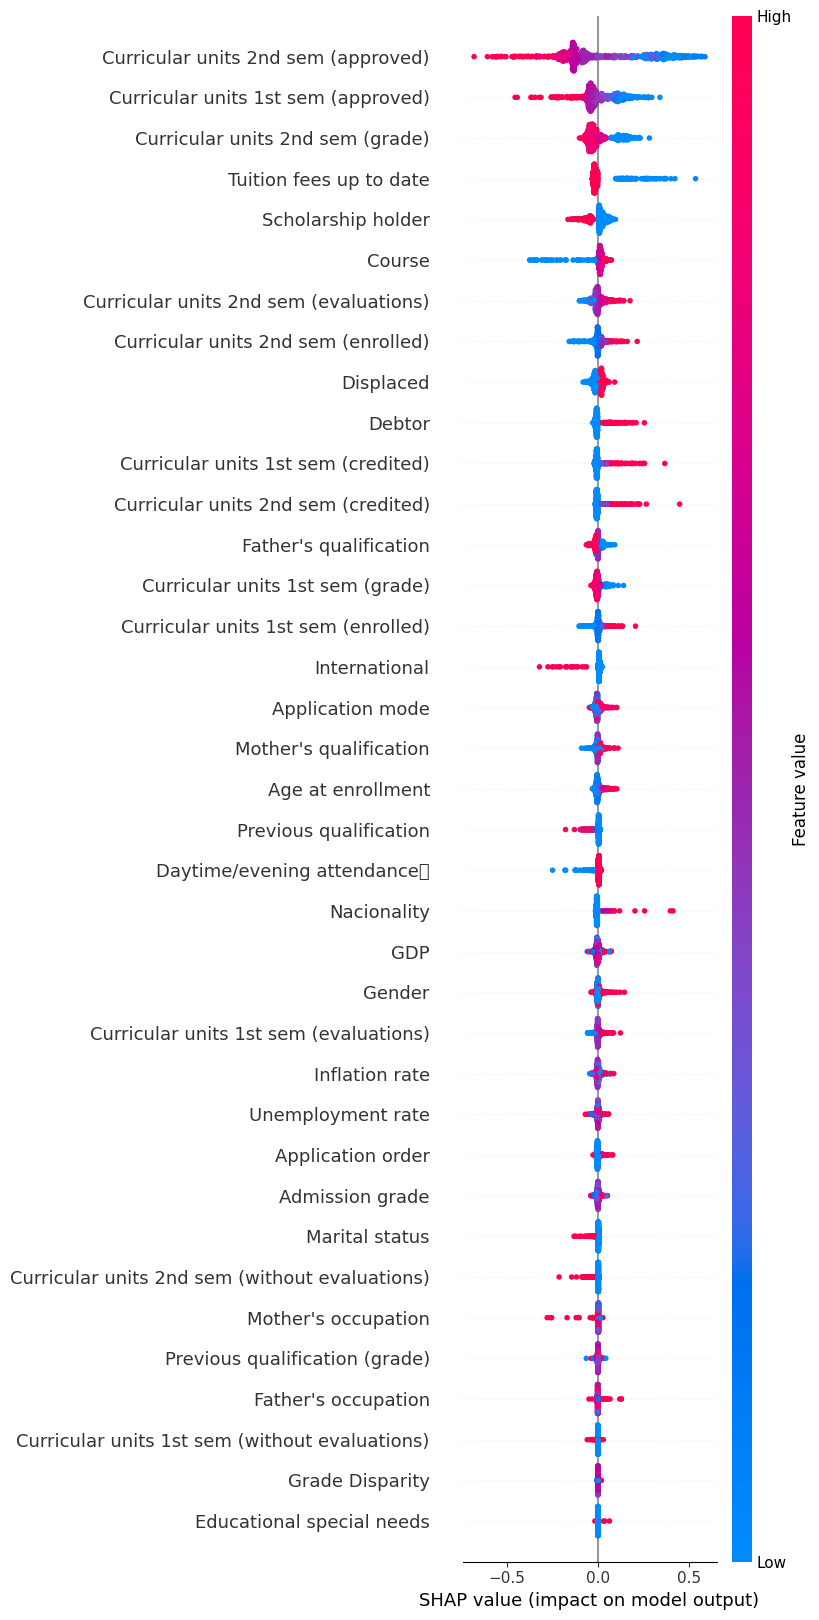

In [28]:
import shap

# Create a SHAP Explainer
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns,  max_display=40)

#### The most important features here are mostly the same as in the early data exploratory analysis. 

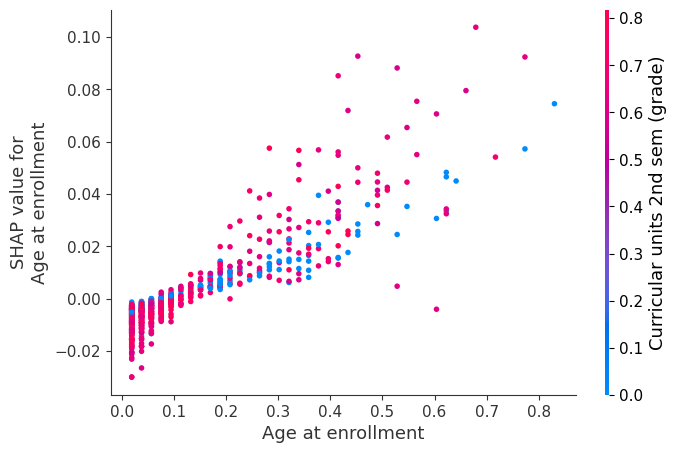

In [29]:
shap.dependence_plot(
    'Age at enrollment', 
    shap_values.values, 
    X_test, 
    feature_names=X.columns,
    interaction_index='Curricular units 2nd sem (grade)'
)

#### Age at enrollment becomes increasingly important as the students get older.